In [1]:
from deepface import DeepFace
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

from utilities import detect_beard, detect_shades

In [2]:
# load df from csv
beard_df = pd.read_csv("libraries and test data/data for model tests/All Labels/beards.csv", header=0)

In [3]:
beard_df

Name   Length True Age True Gender  Predict Age Predict Gender
0   beard01.png   200068    15-25           F         35.0          Woman
1   beard02.png   545947    25-35           M         24.0            Man
2   beard03.png   185065    20-30           F         28.0          Woman
3   beard04.png   666693    20-30           F         24.0          Woman
4   beard05.png    32978    30-40           F         26.0          Woman
5   beard06.png   504711    30-40           M         25.0            Man
6   beard07.png   533656    30-40           M         23.0            Man
7   beard08.png   602570    40-50           F         40.0          Woman
8   beard09.png   598072    30-40           F         34.0          Woman
9   beard10.png   557091    20-30           F         30.0          Woman
10  beard11.png   567123    50-60           M         29.0            Man
11  beard12.png   555144    40-50           F         34.0          Woman
12  beard13.png   595881    40-50           F         41.0            Man
13  beard14.png   528469    20-30           F         24.0          Woman
14  beard15.png   521430    20-30           F         28.0            Man
15  beard16.png   556071    40-50           M         38.0            Man
16  beard17.png   594731    20-30           F         32.0          Woman
17  beard18.png   561650    20-30           M         26.0            Man
18  beard19.png   561351    20-30           M         25.0            Man
19  beard20.png   581912    20-30           M         25.0            Man
20  beard21.png   603125    50-60           M         28.0            Man
21  beard22.png   571104    30-40           F         30.0          Woman
22  beard23.png   547477    20-30           F         29.0          Woman
23  beard24.png   544921    50-60           M         28.0            Man
24  beard25.png   629308    30-40           M         34.0            Man
25  beard26.png   546756    50-60           F         25.0          Woman
26  beard27.png   649307    40-50           F         37.0          Woman
27  beard28.png   535634    40-50           M         35.0            Man
28  beard29.png  1201956    60-70           M         51.0            Man
29  beard30.png  1268264    20-30           M         34.0            Man
30  beard31.png  1332971    15-25           F         31.0          Woman
31  beard32.png  1354433    25-35           F         28.0          Woman
32  beard33.png  1222930    20-30           F         31.0          Woman
33  beard34.png  1288236    20-30           M         28.0            Man
34  beard35.png  1265726    25-35           M         24.0            Man
35  beard36.png  1408359    20-30           F         32.0          Woman
36  beard37.png   925365    25-35           M         28.0            Man
37  beard38.png  1169905    40-50           F         32.0          Woman
38  beard39.png  1434819    35-45           F         40.0          Woman
39  beard40.png  1208564    30-40           F         33.0          Woman
40  beard41.png  1360910    20-30           M         27.0            Man
41  beard42.png  1423168    50-60           M         50.0            Man
42  beard43.png  1265990    30-40           M         26.0            Man
43  beard44.png  1290262    25-35           M         24.0            Man
44  beard45.png  1358556    50-60           M         38.0            Man
45  beard46.png  1351226    25-35           F         29.0          Woman
46  beard47.png  1331242    20-30           F         26.0          Woman
47  beard48.png  1128776    15-25           F         24.0          Woman
48  beard49.png  1446664    25-35           F         23.0            Man
49  beard50.png  1268774    40-50           M         34.0            Man

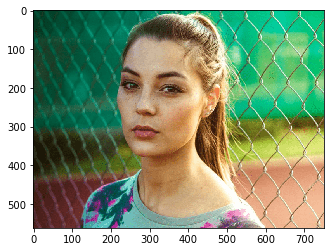

In [4]:
# folder_loc='eyeblink data labels/data/Feature1_data/'

# Correct:
# bbbbbbbbbb0.png   29, Woman
# dddddddddd9.png   35, Man
# aaaaaaaaaa1.png - 30, Man
# eeeeeeeeee1.png   32, Woman
# novarhxpbj149.png 45, Woman

# Incorrect:
# dpevefkefv34.png  35, Man (should be Woman)
# adohdulfwb5.png - 34, Man (should be Woman)
# adohdulfwb41.png  33, Man (should be Woman)
# adohdulfwb99.png  33, Man (should be Woman)

# Deepface has a harder time recognizing women.

folder1_loc='libraries and test data/data for model tests/Beards/'

# to get the next image, increase the value of img1_index
img_index=0

# show the image
img1_path = folder1_loc+str(beard_df['Name'].iloc[img_index])
img1 = cv2.imread(img1_path)
plt.imshow(img1[:, :, ::-1 ]) 
plt.show() 

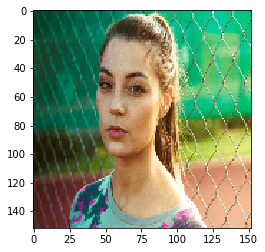

In [5]:
# DeepFace expects a 152 by 152 sized image as input
dimensions=(152,152)
resized=cv2.resize(img1, dimensions)

# Save this image to a temporary directory for later input to DeepFace
folder2_loc='eyeblink data labels/data/temp/'
img2_name = 'beard.png'
img2_path = folder2_loc + img2_name
cv2.imwrite(img2_path, resized)
plt.imshow(resized[:, :, ::-1 ])
plt.show()

In [6]:
# Run DeepFace via the detect_beard function
result1, result2 = detect_beard(img2_path)

Action: gender: 100%|██████████| 2/2 [00:08<00:00,  4.39s/it]

   Age: 35
Gender: Woman


In [7]:
beard_df.loc[img_index, 'Predict Age'] = result1
beard_df.loc[img_index, 'Predict Gender'] = result2

In [8]:
beard_df.to_csv("libraries and test data/data for model tests/All Labels/beards.csv", index=False)

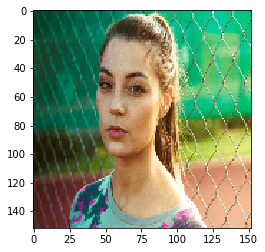

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


   Age: 35
Gender: Woman


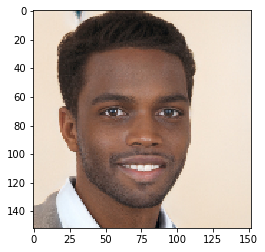

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


   Age: 24
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


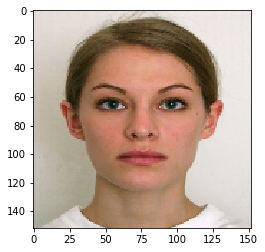

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


   Age: 28
Gender: Woman


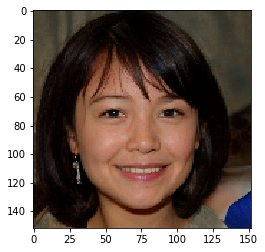

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


   Age: 24
Gender: Woman


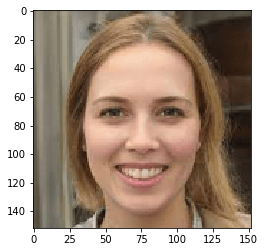

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


   Age: 26
Gender: Woman


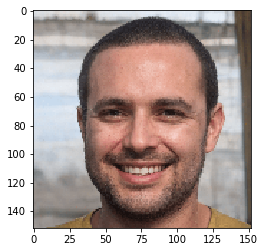

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


   Age: 25
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


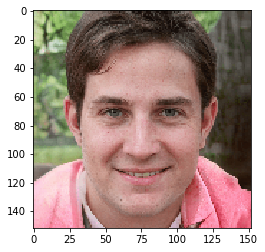

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


   Age: 23
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


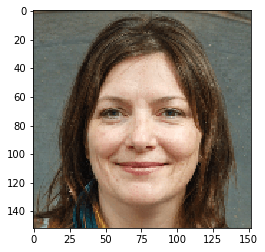

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


   Age: 40
Gender: Woman


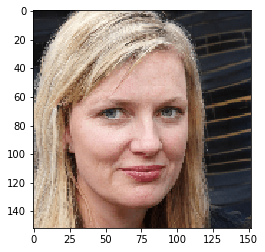

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


   Age: 34
Gender: Woman


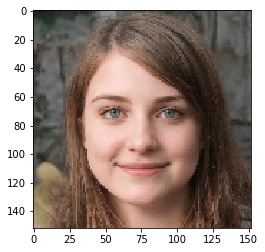

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


   Age: 30
Gender: Woman


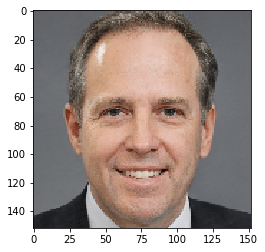

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


   Age: 29
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


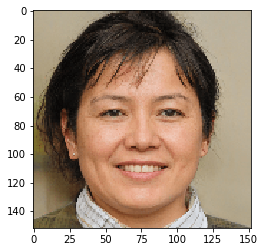

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


   Age: 34
Gender: Woman


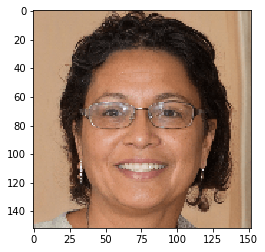

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


   Age: 41
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


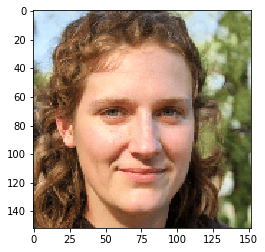

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


   Age: 24
Gender: Woman


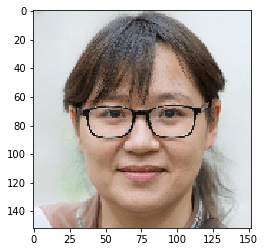

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


   Age: 28
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


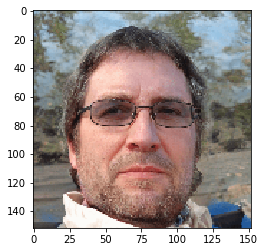

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


   Age: 38
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


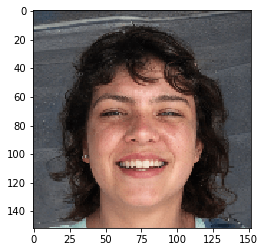

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


   Age: 32
Gender: Woman


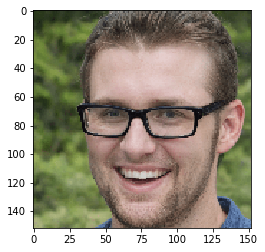

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


   Age: 26
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


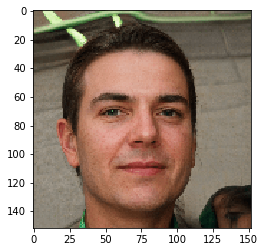

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


   Age: 25
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


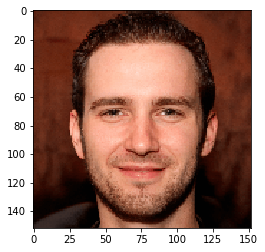

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


   Age: 25
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


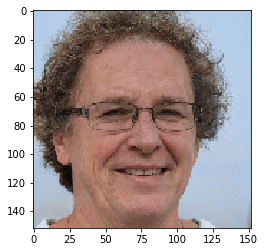

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


   Age: 28
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


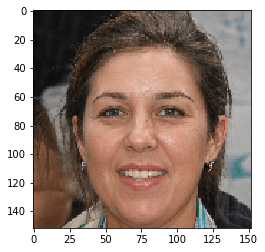

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


   Age: 30
Gender: Woman


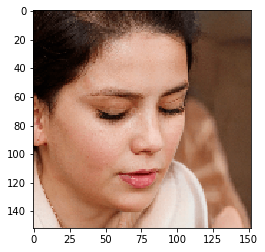

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


   Age: 29
Gender: Woman


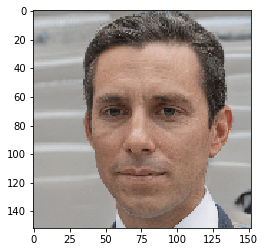

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


   Age: 28
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


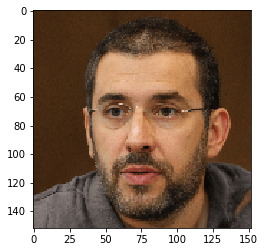

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


   Age: 34
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


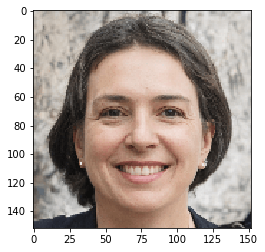

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]


   Age: 25
Gender: Woman


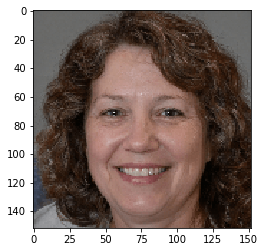

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


   Age: 37
Gender: Woman


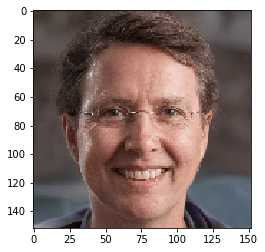

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


   Age: 35
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


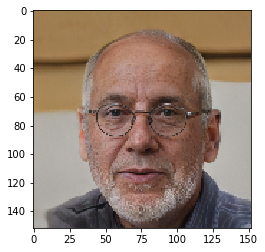

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


   Age: 51
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


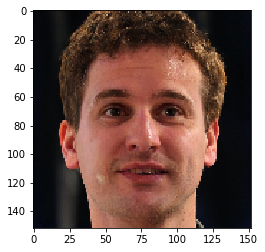

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


   Age: 34
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


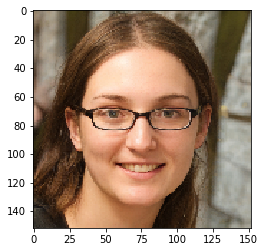

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


   Age: 31
Gender: Woman


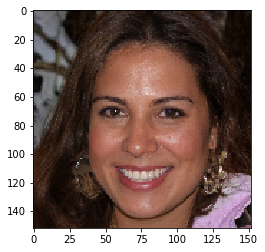

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


   Age: 28
Gender: Woman


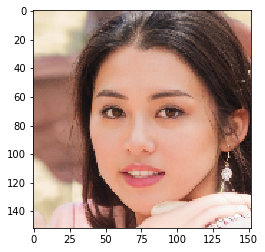

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


   Age: 31
Gender: Woman


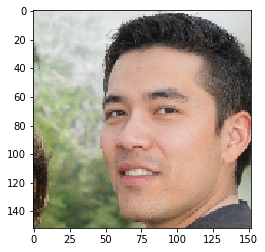

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]


   Age: 28
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


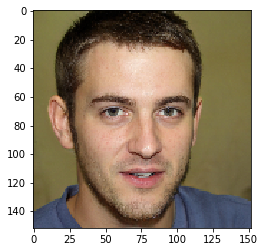

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


   Age: 24
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


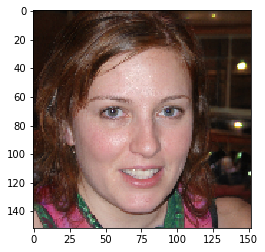

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]


   Age: 32
Gender: Woman


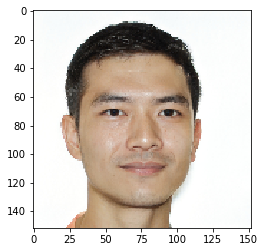

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


   Age: 28
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


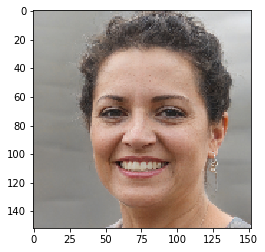

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


   Age: 32
Gender: Woman


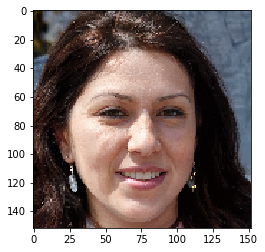

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


   Age: 40
Gender: Woman


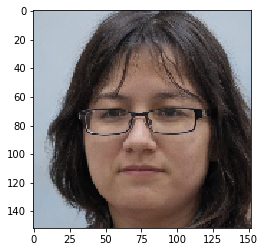

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


   Age: 33
Gender: Woman


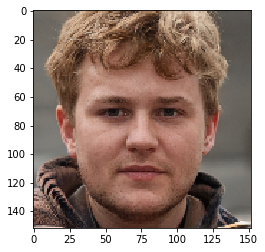

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]


   Age: 27
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


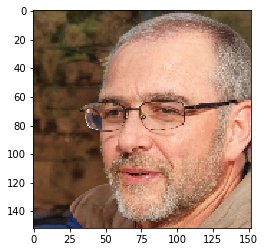

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


   Age: 50
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


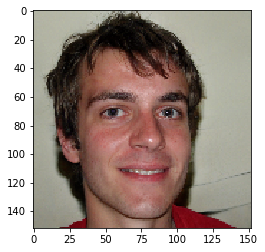

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


   Age: 26
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


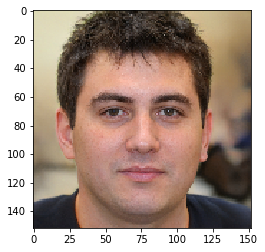

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


   Age: 24
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


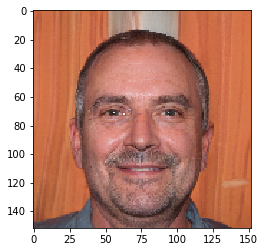

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


   Age: 38
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


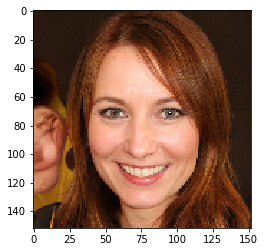

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


   Age: 29
Gender: Woman


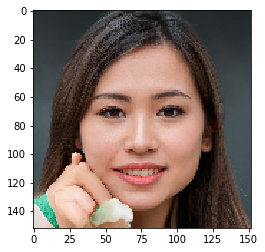

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


   Age: 26
Gender: Woman


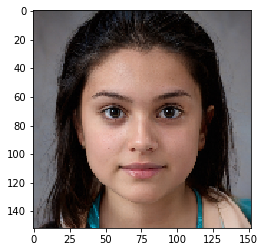

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


   Age: 24
Gender: Woman


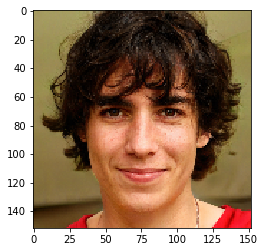

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]


   Age: 23
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


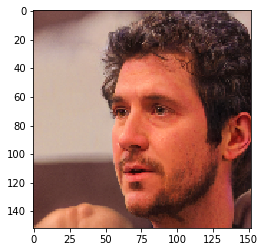

Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

   Age: 34
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


In [9]:
# Do everything above, in a loop, to automate the process.
for i in range(0,50):
    img_index=i
    img1_path = folder1_loc+str(beard_df['Name'].iloc[img_index])
    img1 = cv2.imread(img1_path)
    resized=cv2.resize(img1, dimensions)
    cv2.imwrite(img2_path, resized)
    plt.imshow(resized[:, :, ::-1 ])
    plt.show()
    result1, result2 = detect_beard(img2_path)
    beard_df.loc[img_index, 'Predict Age'] = result1
    beard_df.loc[img_index, 'Predict Gender'] = result2
    beard_df.to_csv("libraries and test data/data for model tests/All Labels/beards.csv", index=False)

In [10]:
# load df from csv
shades_df = pd.read_csv("libraries and test data/data for model tests/All Labels/sunglasses_shades.csv", header=0)

In [11]:
shades_df

Name  Length  Predict
0   sunglasses01.png  303346      NaN
1   sunglasses02.png  373085      NaN
2   sunglasses03.png  447189      NaN
3   sunglasses04.png   56118      NaN
4   sunglasses05.png  113727      NaN
5   sunglasses06.png   43662      NaN
6   sunglasses07.png   52783      NaN
7   sunglasses08.png   45249      NaN
8   sunglasses09.png  160319      NaN
9   sunglasses10.png   56236      NaN
10  sunglasses11.png  210519      NaN
11  sunglasses12.png  105453      NaN
12  sunglasses13.png  551387      NaN
13  sunglasses14.png   87225      NaN
14  sunglasses15.png   74525      NaN
15  sunglasses16.png  399966      NaN
16  sunglasses17.png   99686      NaN
17  sunglasses18.png  503470      NaN
18  sunglasses19.png  342838      NaN
19  sunglasses20.png  251334      NaN

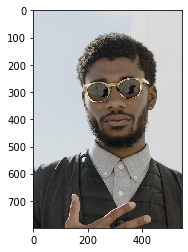

In [12]:
folder3_loc='libraries and test data/data for model tests/Sunglasses/Shades/'

# to get the next image, increase the value of img3_index
img3_index=0

# show the image
img3_path = folder3_loc+str(shades_df['Name'].iloc[img3_index])
img3 = cv2.imread(img3_path)
plt.imshow(img3[:, :, ::-1 ]) 
plt.show() 

In [13]:
result3=detect_shades(img3_path)

Top 5 Object Detection Predictions
suit (25.84%)
Windsor_tie (16.53%)
bow_tie (9.82%)
sunglasses (9.36%)
sunglass (7.97%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


In [14]:
shades_df.loc[img3_index, 'Predict'] = result3

In [15]:
shades_df.to_csv("libraries and test data/data for model tests/All Labels/sunglasses_shades.csv", index=False)

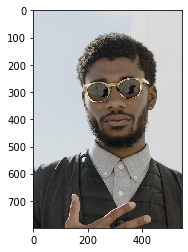

Top 5 Object Detection Predictions
suit (25.84%)
Windsor_tie (16.53%)
bow_tie (9.82%)
sunglasses (9.36%)
sunglass (7.97%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


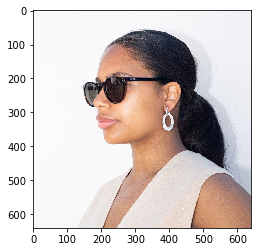

Top 5 Object Detection Predictions
sunglass (45.19%)
sunglasses (42.96%)
wig (1.40%)
neck_brace (0.94%)
lab_coat (0.72%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


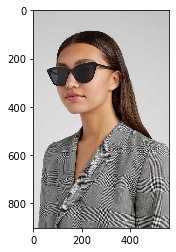

Top 5 Object Detection Predictions
sunglasses (28.47%)
sunglass (23.13%)
trench_coat (5.98%)
stole (4.48%)
suit (4.45%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


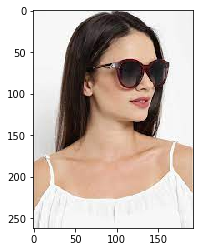

Top 5 Object Detection Predictions
sunglasses (42.80%)
sunglass (34.07%)
brassiere (4.15%)
maillot (3.16%)
miniskirt (3.13%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


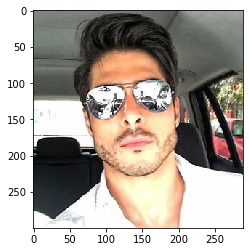

Top 5 Object Detection Predictions
seat_belt (56.35%)
sunglasses (30.52%)
sunglass (7.36%)
minibus (3.11%)
car_mirror (0.96%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


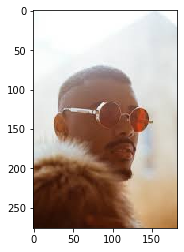

Top 5 Object Detection Predictions
sunglasses (46.21%)
sunglass (41.97%)
maraca (0.58%)
fly (0.55%)
fur_coat (0.44%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


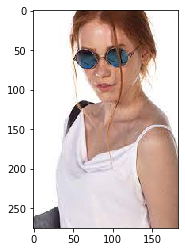

Top 5 Object Detection Predictions
sunglass (31.35%)
sunglasses (27.84%)
lab_coat (17.23%)
maillot (2.74%)
brassiere (1.90%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


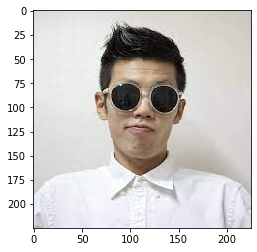

Top 5 Object Detection Predictions
sunglasses (71.86%)
sunglass (24.92%)
lab_coat (1.21%)
bow_tie (0.28%)
suit (0.15%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


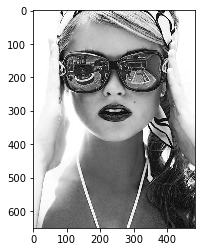

Top 5 Object Detection Predictions
sunglass (39.41%)
sunglasses (16.95%)
mask (3.22%)
bathing_cap (2.36%)
military_uniform (2.25%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


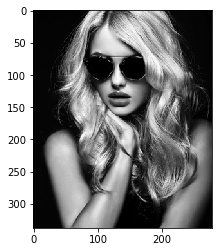

Top 5 Object Detection Predictions
sunglasses (47.24%)
sunglass (43.35%)
wig (1.45%)
brassiere (1.39%)
hair_spray (0.89%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


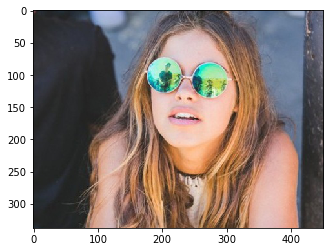

Top 5 Object Detection Predictions
sunglasses (30.40%)
sunglass (27.47%)
wig (6.52%)
jersey (2.36%)
bikini (2.19%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


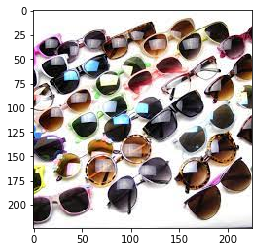

Top 5 Object Detection Predictions
sunglasses (81.73%)
tray (8.66%)
sunglass (5.23%)
trifle (0.45%)
red_wine (0.41%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


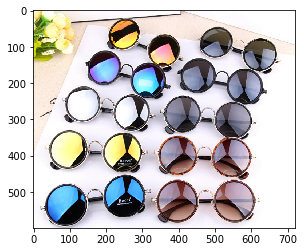

Top 5 Object Detection Predictions
sunglasses (71.44%)
sunglass (7.34%)
necklace (5.89%)
rubber_eraser (1.06%)
tray (1.03%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


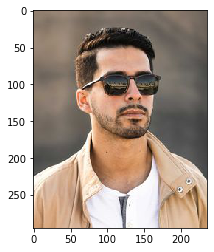

Top 5 Object Detection Predictions
sunglass (31.75%)
sunglasses (13.01%)
military_uniform (9.10%)
suit (2.81%)
racket (2.34%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


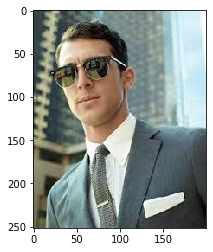

Top 5 Object Detection Predictions
suit (30.11%)
sunglasses (25.48%)
sunglass (24.65%)
Windsor_tie (7.72%)
bow_tie (1.72%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


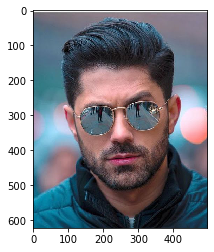

Top 5 Object Detection Predictions
ping-pong_ball (27.09%)
sunglasses (11.10%)
sunglass (10.32%)
pick (5.40%)
stopwatch (3.11%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


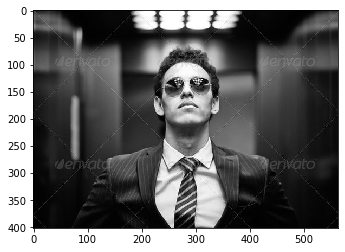

Top 5 Object Detection Predictions
bow_tie (55.58%)
suit (29.49%)
Windsor_tie (9.09%)
groom (1.70%)
microphone (0.36%)
No sunglasses detected.


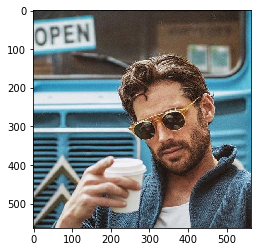

Top 5 Object Detection Predictions
sunglasses (19.79%)
cellular_telephone (11.21%)
sunglass (11.00%)
pay-phone (5.02%)
fur_coat (4.39%)
There appears to be sunglasses. Larger glasses are hard to deepfake.


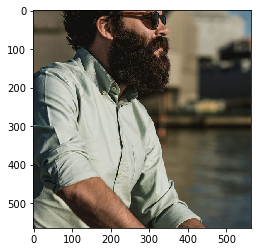

Top 5 Object Detection Predictions
ballplayer (8.27%)
reel (4.46%)
marimba (3.82%)
sunglass (3.13%)
cellular_telephone (2.77%)
No sunglasses detected.


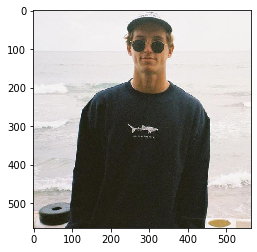

Top 5 Object Detection Predictions
sweatshirt (20.03%)
jersey (7.96%)
abaya (3.23%)
coho (3.08%)
seashore (2.46%)
No sunglasses detected.


In [16]:
# Do everything above, in a loop, to automate the process.
for i in range(0,20):
    img3_index=i
    img3_path = folder3_loc+str(shades_df['Name'].iloc[img3_index])
    img3 = cv2.imread(img3_path)
    plt.imshow(img3[:, :, ::-1 ]) 
    plt.show() 
    result3=detect_shades(img3_path)
    shades_df.loc[img3_index, 'Predict'] = result3
    shades_df.to_csv("libraries and test data/data for model tests/All Labels/sunglasses_shades.csv", index=False)